In [12]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

# Aplanar los datos anidados
df = pd.json_normalize(data)

# Mostrar las primeras filas para ver cómo quedó
print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [20]:
columnas_relevantes = [
    'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
    'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling',
    'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total'
]

df_relevante = df[columnas_relevantes].copy()

In [22]:

# Mostrar las primeras filas para confirmar
print(df_relevante.head())
# 1. Revisar valores ausentes en cada columna
print("Valores ausentes por columna:")
print(df.isnull().sum())

# 2. Eliminar filas con valores faltantes (opción segura para empezar)
df = df.dropna()
print(f"Filas después de eliminar valores faltantes: {len(df)}")

# 3. Revisar filas duplicadas
print(f"Filas duplicadas antes de eliminar: {df.duplicated().sum()}")

# 4. Eliminar filas duplicadas
df = df.drop_duplicates()
print(f"Filas después de eliminar duplicados: {len(df)}")

# 5. Unificar valores en columnas categóricas (ejemplo con 'Churn')
df['Churn'] = df['Churn'].astype(str).str.strip().str.lower()
df['Churn'] = df['Churn'].replace({'yes': 'yes', 'no': 'no'})
# Handle the empty string in 'Churn' if it exists
df = df[df['Churn'] != '']


# 6. Convertir columnas numéricas que puedan estar como texto
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')


# 7. Volver a eliminar filas con NaN que hayan aparecido tras la conversión
df = df.dropna()

# 8. Confirmar tipos de datos y valores únicos en columnas categóricas
print("\nTipos de datos después de limpieza:")
print(df.dtypes)

print("\nValores únicos en 'Churn':")
print(df['Churn'].unique())

  Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0    no          Female                       0              Yes   
1    no            Male                       0               No   
2   yes            Male                       0               No   
3   yes            Male                       1              Yes   
4   yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService internet.OnlineSecurity internet.OnlineBackup  \
0                      DSL  

#📌 Extracción

In [13]:
# 📌 Extracción
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

# Aplanar datos anidados
df = pd.json_normalize(data)

print("Datos cargados y aplanados:")
print(df.head())

Datos cargados y aplanados:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  in

#🔧 Transformación

In [14]:
# 🔧 Transformación

# Revisar columnas y tipos de datos
print("Información del DataFrame:")
print(df.info())

# Crear grupo según tenure (tiempo con el servicio)
df['grupo_tenure'] = pd.cut(df['customer.tenure'], bins=[0, 12, 24, 48, 100], labels=['Nuevo', 'Intermedio', 'Experto', 'Veterano'])

print("Primeras filas con grupo tenure:")
print(df[['customer.tenure', 'grupo_tenure']].head())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport 

In [24]:
# --- Estandarización y transformación de datos ---

# Convertir valores "yes"/"no" a 1/0 en columnas binarias
columnas_binarias = [
    'Churn', 'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity',
    'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling'
]

for col in columnas_binarias:
    df_relevante[col] = df_relevante[col].str.strip().str.lower().map({'yes': 1, 'no': 0})

# Renombrar columnas para mayor claridad
df_relevante.rename(columns={
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'AdultoMayor',
    'customer.Partner': 'Pareja',
    'customer.Dependents': 'Dependientes',
    'customer.tenure': 'MesesContrato',
    'account.Contract': 'TipoContrato',
    'account.PaymentMethod': 'MetodoPago',
    'account.Charges.Monthly': 'CobroMensual',
    'account.Charges.Total': 'CobroTotal',
    'Cuentas_Diarias': 'CobroDiario'
}, inplace=True)

# Convertir variables categóricas a tipo 'category'
categoricas = ['Genero', 'TipoContrato', 'MetodoPago']
for col in categoricas:
    df_relevante[col] = df_relevante[col].astype('category')

# Mostrar las primeras filas para verificar
print(df_relevante.head())

   Churn  Genero  AdultoMayor Pareja Dependientes  MesesContrato  \
0      0  Female            0    Yes          Yes              9   
1      0    Male            0     No           No              9   
2      1    Male            0     No           No              4   
3      1    Male            1    Yes           No             13   
4      1  Female            1    Yes           No              3   

   phone.PhoneService  phone.MultipleLines internet.InternetService  \
0                   1                  0.0                      DSL   
1                   1                  1.0                      DSL   
2                   1                  0.0              Fiber optic   
3                   1                  0.0              Fiber optic   
4                   1                  0.0              Fiber optic   

   internet.OnlineSecurity  ...  internet.DeviceProtection  \
0                      0.0  ...                        0.0   
1                      0.0  ...         

In [25]:
# Análisis descriptivo de las columnas numéricas
descripcion = df_relevante.describe()

print(descripcion)

             Churn  AdultoMayor  MesesContrato  phone.PhoneService  \
count  7032.000000  7032.000000    7032.000000         7032.000000   
mean      0.265785     0.162400      32.421786            0.903299   
std       0.441782     0.368844      24.545260            0.295571   
min       0.000000     0.000000       1.000000            0.000000   
25%       0.000000     0.000000       9.000000            1.000000   
50%       0.000000     0.000000      29.000000            1.000000   
75%       1.000000     0.000000      55.000000            1.000000   
max       1.000000     1.000000      72.000000            1.000000   

       phone.MultipleLines  internet.OnlineSecurity  internet.OnlineBackup  \
count          6352.000000              5512.000000            5512.000000   
mean              0.467097                 0.365566               0.439949   
std               0.498955                 0.481632               0.496426   
min               0.000000                 0.000000      

#📊 Carga y análisis

Clientes por tipo de servicio de internet:
internet.InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64


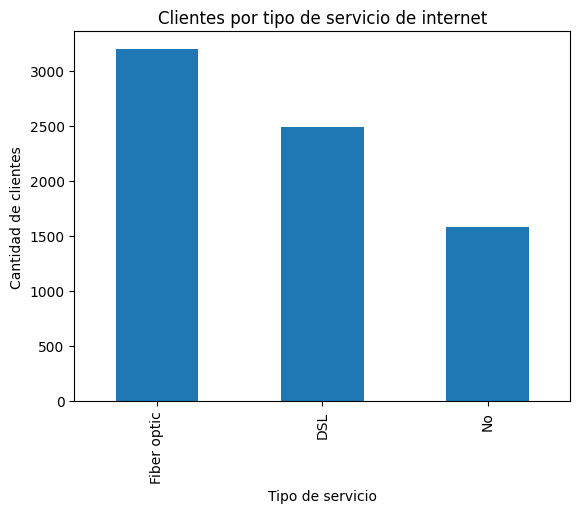

Conteo de Churn (evasión):
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


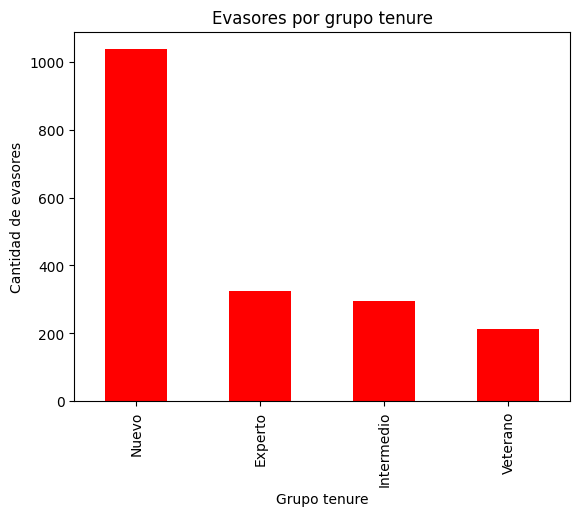

In [15]:
# 📊 Carga y análisis
import matplotlib.pyplot as plt

# Conteo de clientes por tipo de servicio de internet
print("Clientes por tipo de servicio de internet:")
print(df['internet.InternetService'].value_counts())

# Gráfico de barras
df['internet.InternetService'].value_counts().plot(kind='bar')
plt.title('Clientes por tipo de servicio de internet')
plt.xlabel('Tipo de servicio')
plt.ylabel('Cantidad de clientes')
plt.show()

# Análisis de evasión (Churn)
print("Conteo de Churn (evasión):")
print(df['Churn'].value_counts())

# Evasión por grupo tenure
evasores = df[df['Churn'] == 'Yes']
evasores['grupo_tenure'].value_counts().plot(kind='bar', color='red')
plt.title('Evasores por grupo tenure')
plt.xlabel('Grupo tenure')
plt.ylabel('Cantidad de evasores')
plt.show()

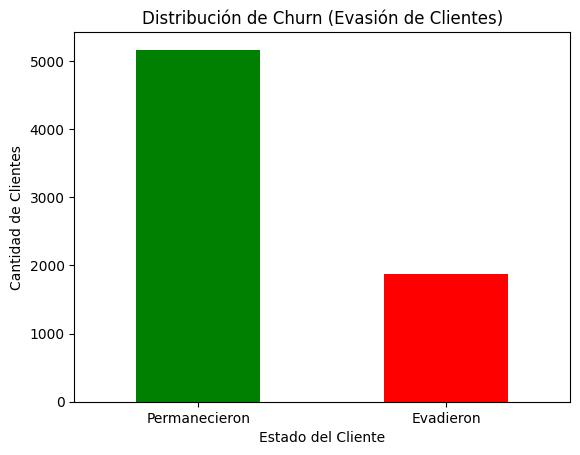

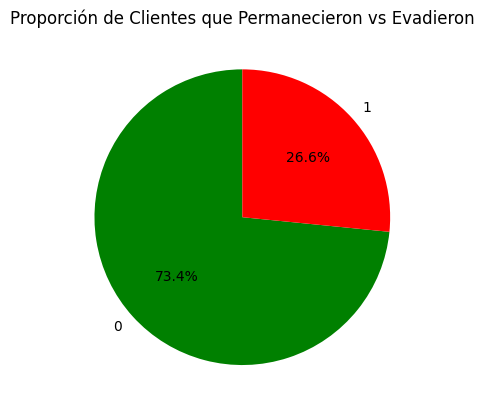

In [26]:
import matplotlib.pyplot as plt

# Contar valores de Churn
conteo_churn = df_relevante['Churn'].value_counts()

# Gráfico de barras
conteo_churn.plot(kind='bar', color=['green', 'red'])
plt.title('Distribución de Churn (Evasión de Clientes)')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cantidad de Clientes')
plt.xticks(ticks=[0,1], labels=['Permanecieron', 'Evadieron'], rotation=0)
plt.show()

# Gráfico de pastel
conteo_churn.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Proporción de Clientes que Permanecieron vs Evadieron')
plt.ylabel('')
plt.show()


Proporción de evasión según Genero (%):
Churn           0          1
Genero                      
Female  73.040482  26.959518
Male    73.795435  26.204565


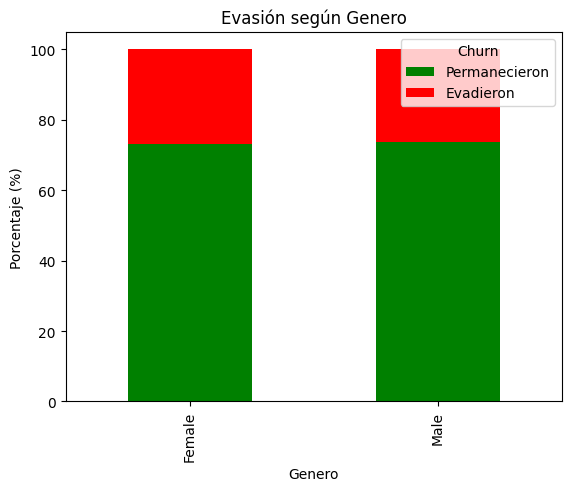


Proporción de evasión según TipoContrato (%):
Churn                   0          1
TipoContrato                        
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


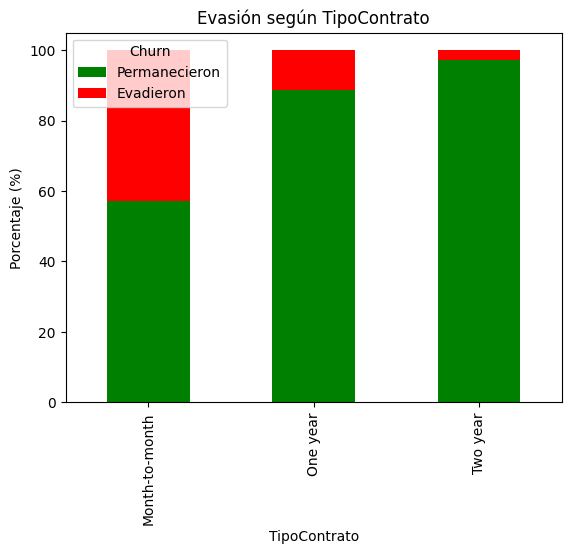


Proporción de evasión según MetodoPago (%):
Churn                              0          1
MetodoPago                                     
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


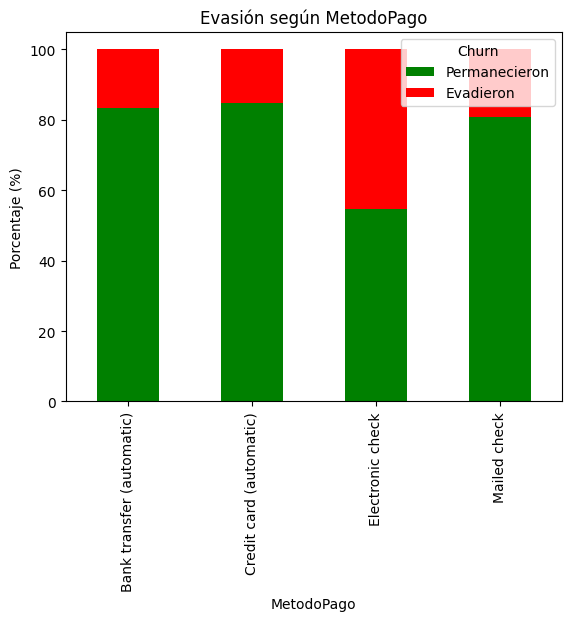

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables categóricas a analizar
variables = ['Genero', 'TipoContrato', 'MetodoPago']

for var in variables:
    # Tabla de proporciones de evasión por categoría
    tabla = pd.crosstab(df_relevante[var], df_relevante['Churn'], normalize='index') * 100
    print(f"\nProporción de evasión según {var} (%):")
    print(tabla)

    # Gráfico de barras apiladas para visualizar
    tabla.plot(kind='bar', stacked=True, color=['green', 'red'])
    plt.title(f'Evasión según {var}')
    plt.xlabel(var)
    plt.ylabel('Porcentaje (%)')
    plt.legend(title='Churn', labels=['Permanecieron', 'Evadieron'])
    plt.show()


Análisis de CobroTotal según Churn:
        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
0      5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
1      1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
0      8672.45  
1      8684.80  


<ipython-input-28-135274108>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df_relevante, palette=['green', 'red'])


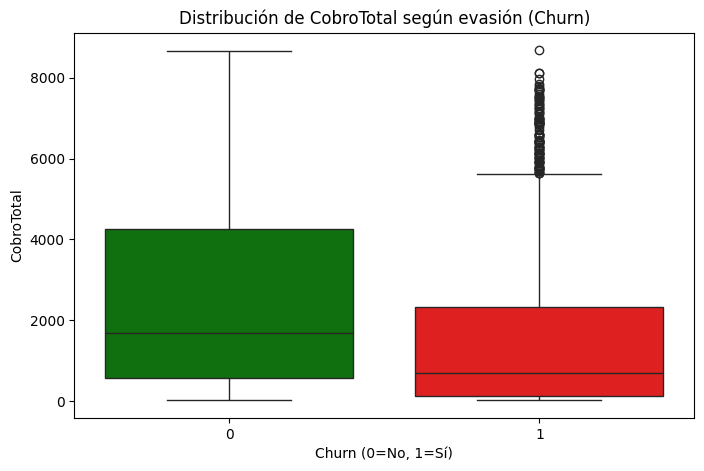


Análisis de MesesContrato según Churn:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


<ipython-input-28-135274108>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df_relevante, palette=['green', 'red'])


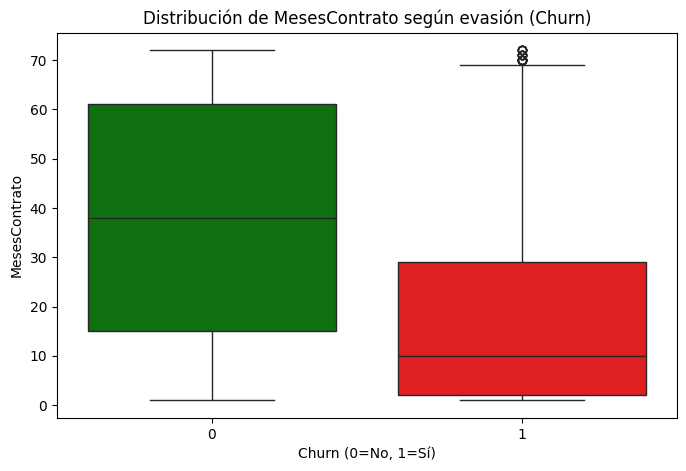


Análisis de CobroMensual según Churn:
        count       mean        std    min    25%    50%     75%     max
Churn                                                                   
0      5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35


<ipython-input-28-135274108>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df_relevante, palette=['green', 'red'])


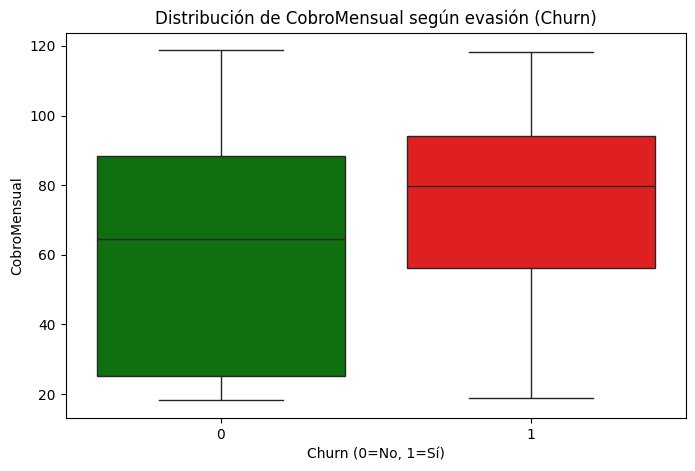


Análisis de CobroDiario según Churn:
        count      mean       std       min       25%       50%       75%  \
Churn                                                                       
0      5163.0  2.043580  1.036485  0.608333  0.836667  2.148333  2.949167   
1      1869.0  2.481378  0.822202  0.628333  1.871667  2.655000  3.140000   

            max  
Churn            
0      3.958333  
1      3.945000  


<ipython-input-28-135274108>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df_relevante, palette=['green', 'red'])


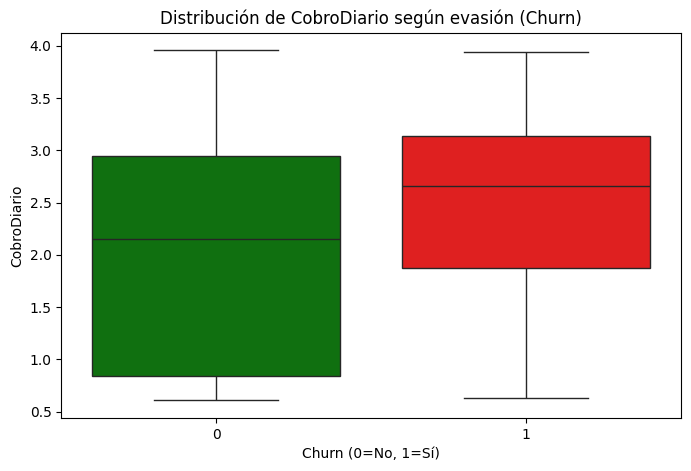

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a analizar
variables_numericas = ['CobroTotal', 'MesesContrato', 'CobroMensual', 'CobroDiario']

for var in variables_numericas:
    print(f"\nAnálisis de {var} según Churn:")
    print(df_relevante.groupby('Churn')[var].describe())

    # Gráfico de caja para comparar distribuciones
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Churn', y=var, data=df_relevante, palette=['green', 'red'])
    plt.title(f'Distribución de {var} según evasión (Churn)')
    plt.xlabel('Churn (0=No, 1=Sí)')
    plt.ylabel(var)
    plt.show()

In [23]:
# Crear columna Cuentas_Diarias dividiendo el cargo mensual entre 30 días
df_relevante['Cuentas_Diarias'] = df_relevante['account.Charges.Monthly'] / 30

# Mostrar las primeras filas para verificar
print(df_relevante[['account.Charges.Monthly', 'Cuentas_Diarias']].head())

   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667



# 📄 Informe final  
  
- Se cargaron y aplanaron los datos de clientes de TelecomX.  
- Se creó un grupo de clientes según el tiempo que llevan con el servicio (tenure).  
- La mayoría de los clientes usan el servicio de internet X (según el gráfico).  
- Se observó la cantidad de clientes que han dejado el servicio (Churn).  
- La evasión se concentra en ciertos grupos de tenure, lo que puede ayudar a enfocar estrategias de retención.